# Removing Trends - Lab

## Introduction

In this lab, you'll practice your detrending skills!

## Objectives

You will be able to:
* Learn how to remove trends and seasonality
* Use a log transformation to minimize non-stationarity
* Use rolling means to reduce non-stationarity
* Use differencing to reduce non-stationarity

## Detrending the Airpassenger data

In [42]:
# Import necessary libraries

# Import passengers.csv and set it as a time-series object. Plot the TS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('talk')

In [43]:
df = pd.read_csv('passengers.csv')
df.Month = pd.to_datetime(df.Month)
df.set_index('Month', inplace=True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


## Create a stationarity check

At this stage, we can use the code from previous labs to create a function `stationarity_check(ts)` that takes in a time series object and performs stationarity checks including rolling statistics and the Dickey Fuller test. 

We want the output of the function to:
- Plot the original time series along with the rolling mean and rolling standard deviation in one plot
- Output the results of the Dickey-Fuller test

In [44]:
# Create a function to check for the stationarity of a given timeseries using rolling stats and DF test
# Collect and package the code from previous lab
def stationery_check(ts, window):
    plt.figure(figsize=(12,7))
    plt.plot(ts, label='Passenger counts')
    plt.plot(ts.rolling(window=window).mean(), label='Moving AVG')
    plt.plot(ts.rolling(window=window).std(), label='Moving STD')
    plt.legend()
    plt.show()

Use your newly created function on the airpassenger data set.

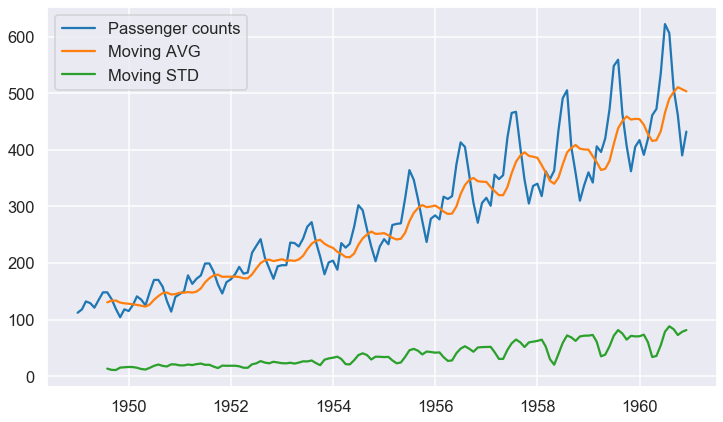

In [45]:
# Code here
stationery_check(df,8)

## Perform a log() and sqrt() transform

In [46]:
# Log transform timeseries and compare with original to check the effect
def log_transform(ts):
    return np.log(ts)

def sqrt_transform(ts):
    return np.sqrt(ts)

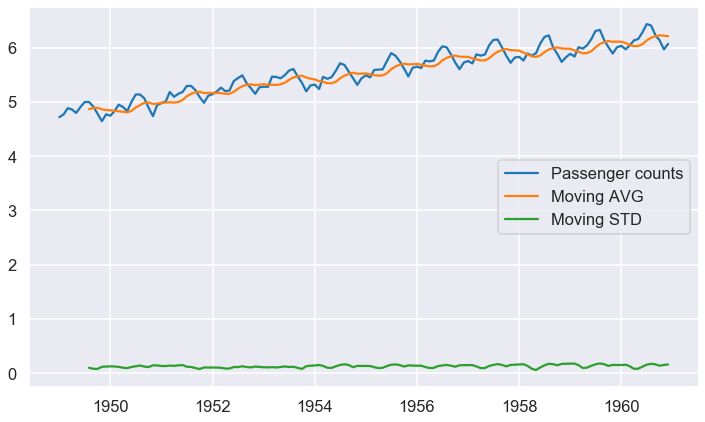

In [47]:
stationery_check(log_transform(df),8)

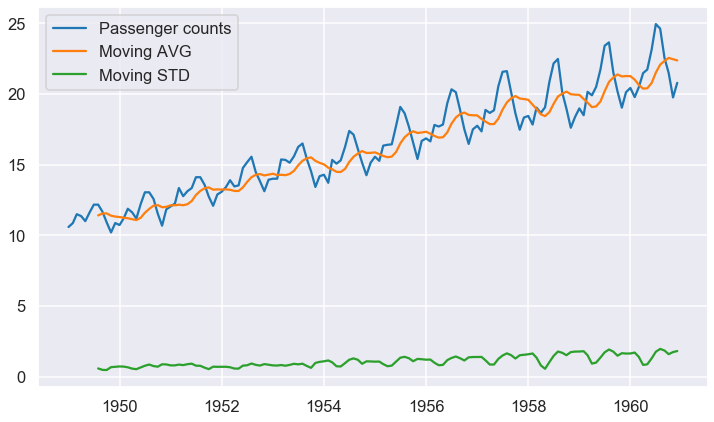

In [48]:
stationery_check(sqrt_transform(df),8)

moving forward, let's keep working with the log transformed data before subtracting rolling mean, differencing, etc.

## Subtracting the rolling mean

In [49]:
rolling_mean = data.rolling(window=7).mean()

Now, subtract the rolling mean from the time series, look at the 10 first elements of the result and plot the result.

In [50]:
# Subtract the moving average from the original data and check head for Nans
data -= rolling_mean
data.head()

,#Passengers
Month,
1950-01-01,NaN
1950-02-01,NaN
1950-03-01,NaN
1950-04-01,NaN
1950-05-01,NaN


In [51]:
# Drop the NaN values from timeseries calculated above
data.dropna(inplace=True)

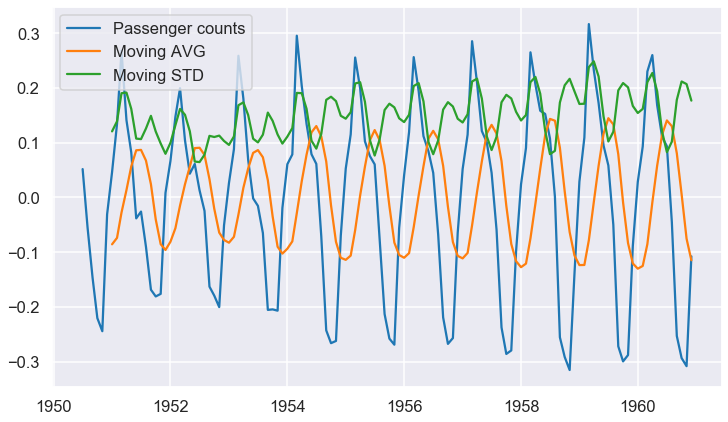

In [52]:
# Plot the result
stationery_check(data,7)

Finally, use your function `check_stationarity` to see if this series is considered stationary!

In [53]:
# Your code here

from statsmodels.tsa.stattools import adfuller

#Perform Dickey-Fuller test:
print ('Results of Dickey-Fuller Test:')
dftest = adfuller(data['#Passengers'])

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                -5.958212e+00
p-value                        2.068813e-07
#Lags Used                     1.300000e+01
Number of Observations Used    1.120000e+02
Critical Value (1%)           -3.490131e+00
Critical Value (5%)           -2.887712e+00
Critical Value (10%)          -2.580730e+00
dtype: float64


Our p-value is extremely small, so we can reject the null hypothesis and say that the time series is stationery after transformation.

## Subtracting the weighted rolling mean

Repeat all the above for the *weighter* rolling mean. Start from the log-transformed data again. Compare the Dickey-Fuller Test results. What do you conclude?

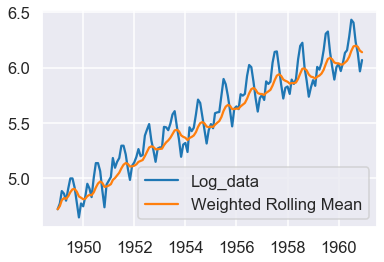

In [60]:
# Use Pandas ewma() to calculate Weighted Moving Average of ts_log

# Plot the original data with exp weighted average
ts_log = log_transform(df)
erm = ts_log.ewm(halflife=4).mean()
plt.plot(ts_log, label='Log_data')
plt.plot(erm, label='Weighted Rolling Mean')
plt.legend()

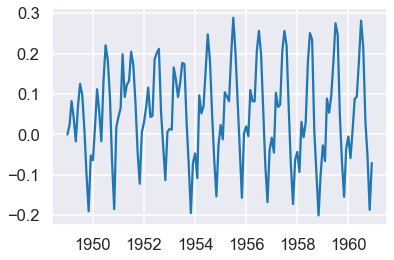

In [66]:
# Subtract the moving average from the original data and plot
weighted_ts_log = ts_log - erm
weighted_ts_log.head()
plt.plot(weighted_ts_log)

In [68]:
# do a stationarity check
#Perform Dickey-Fuller test:
def df_test(ts):
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(weighted_ts_log['#Passengers'])

    # Extract and display test results in a user friendly manner
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

In [69]:
df_test(weighted_ts_log)

Results of Dickey-Fuller Test:


Test Statistic                  -3.297250
p-value                          0.015002
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

### Based on the visuals and on the Dickey-Fuller test, what do you conclude?


Our mean is now constant, though it is still extremely periodic.

## Differencing

Using exponentially weighted moving averages, we seem to have removed the upward trend, but not the seasonality issue. Now use differencing to remove seasonality. Make sure you use the right amount of `periods`. Start from the log-transformed, exponentially weighted rolling mean-subtracted series.

After you differenced the series, run the `stationarity check` again.

In [70]:
# difference your data and look at the head
data_dif = weighted_ts_log.diff(periods=12)

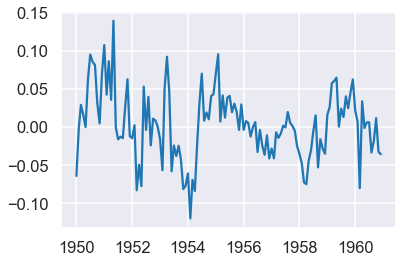

In [71]:
# plot your differenced time series
plt.plot(data_dif)

In [73]:
# drop nas
data_dif.dropna(inplace=True)

In [74]:
# perform the stationarity check
df_test(data_dif)

Results of Dickey-Fuller Test:


Test Statistic                  -3.297250
p-value                          0.015002
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64

### Your conclusion

Our data is stationery. Seasonality is reduced.

## Summary 

In this lab, you learned how to make time series stationary through using log transforms, rolling means and differencing.